## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset preparation

Load data

In [2]:
red_wine_path = 'F:/AI/Dataset/wine+quality/winequality-red.csv'
white_wine_path = 'F:/AI/Dataset/wine+quality/winequality-white.csv'

# Load winequality-red.csv và winequality-white.csv
wine_columns = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
    'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'
]
red_wine = pd.read_csv(red_wine_path, sep=';', skiprows=1, names=wine_columns)
white_wine = pd.read_csv(white_wine_path, sep=';', skiprows=1, names=wine_columns)

# Thêm cột wine_type
red_wine['wine_type'] = 0  # Red
white_wine['wine_type'] = 1  # White

# Gộp dataset
wine_combined = pd.concat([red_wine, white_wine], ignore_index=True)

# Nhóm chất lượng thành 3 lớp
bins = [0, 4, 6, 10]  # Khoảng: Low (0-4), Standard (5-6), High (7-10)
labels = [0, 1, 2]  # 0: Low, 1: Standard, 2: High
wine_combined['quality'] = pd.cut(wine_combined['quality'], bins=bins, labels=labels, include_lowest=True)

# Preprocess
X_wine = wine_combined.drop('quality', axis=1)  # Features, bao gồm wine_type
y_wine = wine_combined['quality'].astype(int)  # Target

# Scale features
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

# In thông tin
print("Combined Wine Quality - Features head:\n", X_wine.head())
print("Combined Wine Quality - Features shape:", X_wine_scaled.shape)
print("Combined Wine Quality - Target shape:", y_wine.shape)
print("Combined Wine Quality - Target value counts:\n", y_wine.value_counts())

Combined Wine Quality - Features head:
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  wine_type  
0      9.4          0 

Split proportions and perform

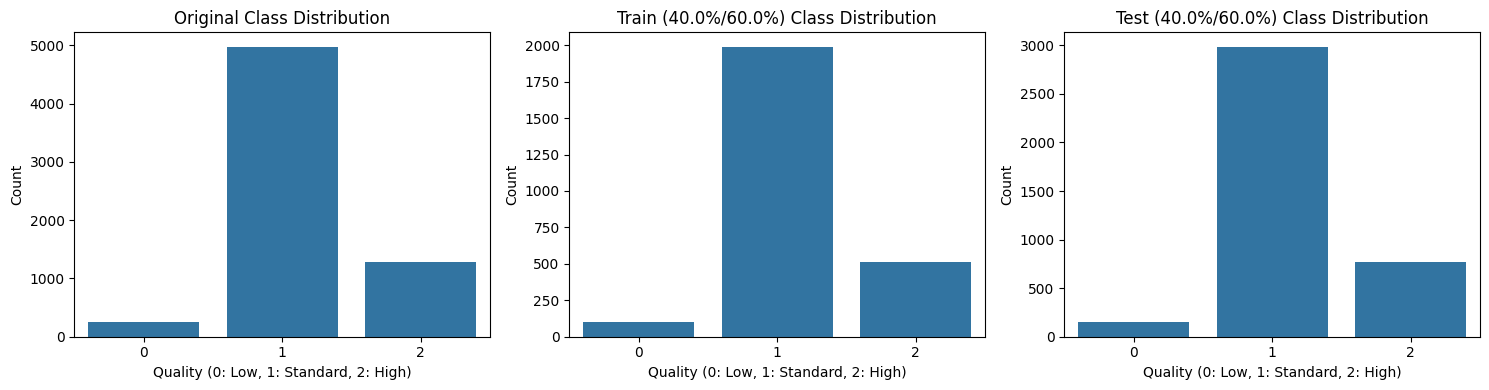


Proportions for 40.0%/60.0% split:
Original class distribution (%): quality
1    76.558412
2    19.655225
0     3.786363
Name: proportion, dtype: float64
Train class distribution (%): quality
1    76.558891
2    19.668976
0     3.772132
Name: proportion, dtype: float64
Test class distribution (%): quality
1    76.558092
2    19.646063
0     3.795845
Name: proportion, dtype: float64


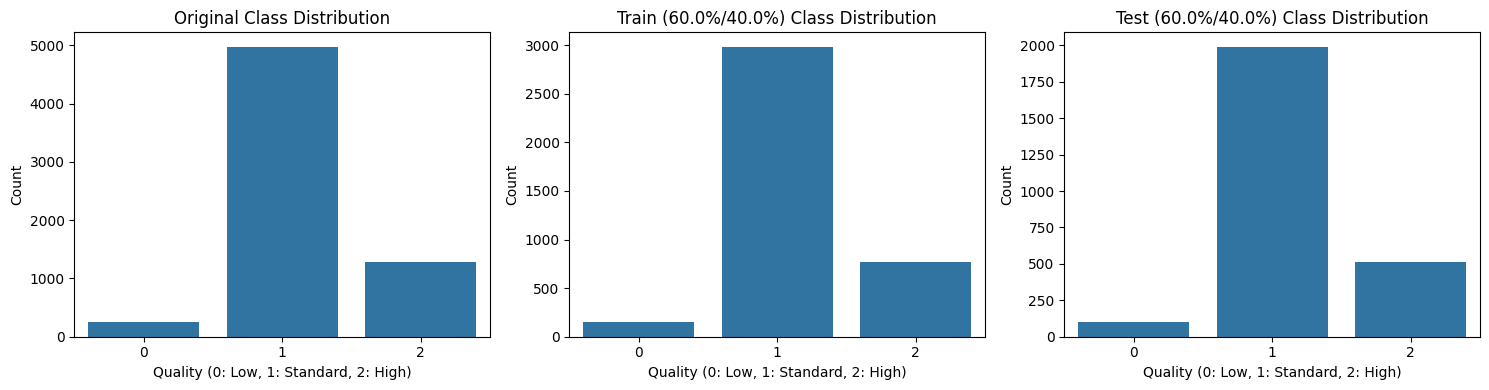


Proportions for 60.0%/40.0% split:
Original class distribution (%): quality
1    76.558412
2    19.655225
0     3.786363
Name: proportion, dtype: float64
Train class distribution (%): quality
1    76.552078
2    19.651103
0     3.796819
Name: proportion, dtype: float64
Test class distribution (%): quality
1    76.567911
2    19.661408
0     3.770681
Name: proportion, dtype: float64


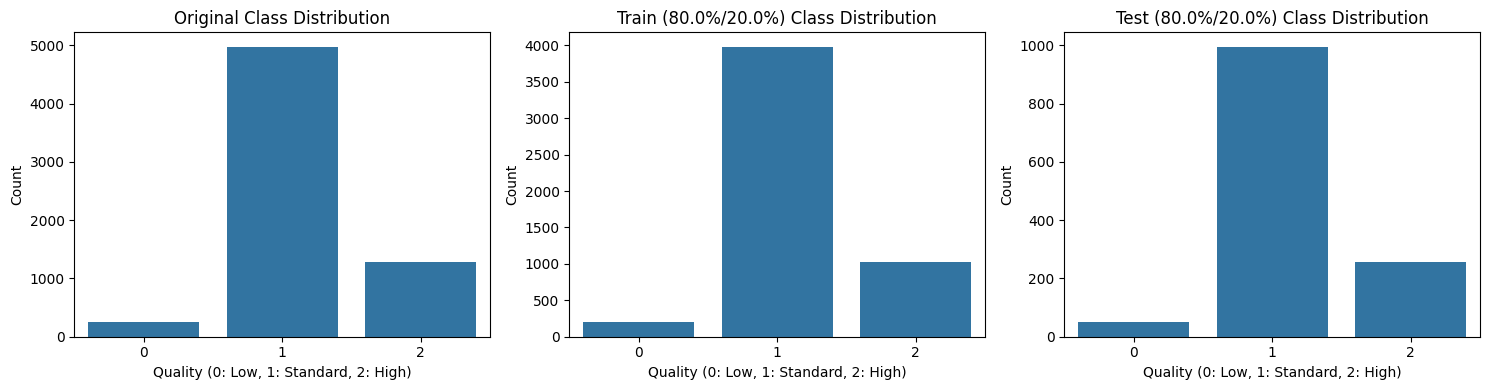


Proportions for 80.0%/20.0% split:
Original class distribution (%): quality
1    76.558412
2    19.655225
0     3.786363
Name: proportion, dtype: float64
Train class distribution (%): quality
1    76.563402
2    19.645950
0     3.790648
Name: proportion, dtype: float64
Test class distribution (%): quality
1    76.538462
2    19.692308
0     3.769231
Name: proportion, dtype: float64


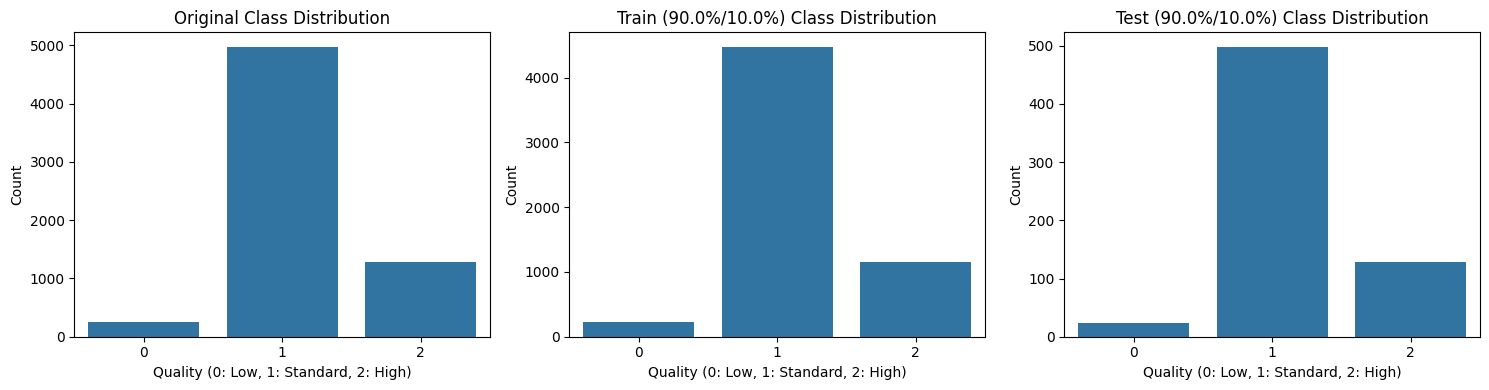


Proportions for 90.0%/10.0% split:
Original class distribution (%): quality
1    76.558412
2    19.655225
0     3.786363
Name: proportion, dtype: float64
Train class distribution (%): quality
1    76.552078
2    19.651103
0     3.796819
Name: proportion, dtype: float64
Test class distribution (%): quality
1    76.615385
2    19.692308
0     3.692308
Name: proportion, dtype: float64


In [ ]:
proportions = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
subsets = {}

for train_size, test_size in proportions:
    X_train, X_test, y_train, y_test = train_test_split(
        X_wine_scaled, y_wine, train_size=train_size, test_size=test_size, 
        stratify=y_wine, shuffle=True, random_state=42
    )
        
    # Lưu trữ 4 tập hợp
    subsets[f'feature_train_{int(train_size*100)}'] = X_train
    subsets[f'label_train_{int(train_size*100)}'] = y_train
    subsets[f'feature_test_{int(test_size*100)}'] = X_test
    subsets[f'label_test_{int(test_size*100)}'] = y_test
        
    # Hiển thị phân phối lớp cho mỗi tập hợp
    plt.figure(figsize=(15, 4))
        
    # Original dataset
    plt.subplot(1, 3, 1)
    sns.countplot(x=y_wine, order=[0, 1, 2])
    plt.title('Original Class Distribution')
    plt.xlabel('Quality (0: Low, 1: Standard, 2: High)')
    plt.ylabel('Count')
        
    # Training set
    plt.subplot(1, 3, 2)
    sns.countplot(x=y_train, order=[0, 1, 2])
    plt.title(f'Train ({train_size*100}%/{test_size*100}%) Class Distribution')
    plt.xlabel('Quality (0: Low, 1: Standard, 2: High)')
    plt.ylabel('Count')
        
    # Test set
    plt.subplot(1, 3, 3)
    sns.countplot(x=y_test, order=[0, 1, 2])
    plt.title(f'Test ({train_size*100}%/{test_size*100}%) Class Distribution')
    plt.xlabel('Quality (0: Low, 1: Standard, 2: High)')
    plt.ylabel('Count')
        
    plt.tight_layout()
    plt.show()
        
    # In thông tin phân phối lớp cho mỗi tập hợp
    print(f"\nProportions for {train_size*100}%/{test_size*100}% split:")
    print("Original class distribution (%):", y_wine.value_counts(normalize=True) * 100)
    print("Train class distribution (%):", y_train.value_counts(normalize=True) * 100)
    print("Test class distribution (%):", y_test.value_counts(normalize=True) * 100)